**The purpose of this project is to detect pan card tampering using Computer vision. This project will help the organization in detecting whether the Id i.e. the PAN card provided to them by their employees or customer or anyone is original or not.**

**#STEPS **

1.  Get Images from User
2.  Check for size and Format of the Image
3.  Change shape and size of the image according to the original image
4.  Convert the image to grayscale
5.  Find the similarity index of the images
6.  Finding the threshold of the image
7.  Finding the contour and grab those contours using Imutils
8.  Draw Bounding Rectangle using these contours
9.  Plot difference, threshold, original and tempered image
10. Compare all the images and check the similarity score to decide tampering.



 

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
# import the packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [7]:
# Open image and display

In [11]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

In [14]:
# Load the original and user provided images

# The file format
print('Original Image Format: ', original.format)
print('Tampered Image Format: ', tampered.format)

#Imagesize, in pixels. The size is given as a 2-tuple(width,height)

print('Original Image size: ', original.size)
print('Tampered Image size: ', tampered.size)

Original Image Format:  JPEG
Tampered Image Format:  PNG
Original Image size:  (1200, 800)
Tampered Image size:  (282, 179)


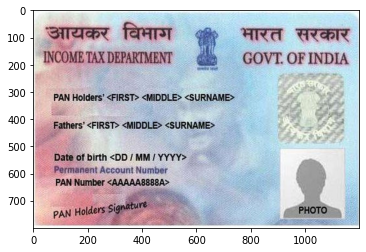

In [17]:
plt.imshow(original)

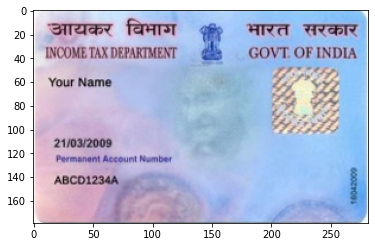

In [18]:
plt.imshow(tampered)

In [20]:
# Convert the format of tampered image similar to original image

original = original.resize((250,160))
print(original.size)
original.save('/content/gdrive/MyDrive/Machine_Learning_projects/PAN_CARD_Tampering_Detection/pan_card_tampering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/gdrive/MyDrive/Machine_Learning_projects/PAN_CARD_Tampering_Detection/pan_card_tampering/image/tampered.png')



(250, 160)
(250, 160)


In [22]:
# Load the images using cv2 and preprocess the image

original = cv2.imread('/content/gdrive/MyDrive/Machine_Learning_projects/PAN_CARD_Tampering_Detection/pan_card_tampering/image/original.png')
tampered = cv2.imread('/content/gdrive/MyDrive/Machine_Learning_projects/PAN_CARD_Tampering_Detection/pan_card_tampering/image/tampered.png')

In [24]:
# Convert image into grayscale

original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)


In [31]:
# Compute the structural similartiy between two images, ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype('uint8')

print("SSIM: {}".format(score))

SSIM: 0.31678790332739426


In [32]:
diff

array([[215, 208, 191, ...,  93,  89,  92],
       [214, 215, 204, ..., 122, 120, 112],
       [218, 221, 218, ..., 150, 148, 140],
       ...,
       [183, 199, 198, ..., 180, 183, 193],
       [173, 190, 178, ..., 156, 167, 183],
       [149, 179, 171, ..., 141, 150, 156]], dtype=uint8)

In [34]:
# Calculating threshold and contours

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours( thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [37]:
# loop over the conrours

for c in cnts:
  #applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y),(x+w, y+h), (0,0,255), 2)
  cv2.rectangle(tampered, (x,y),(x+w, y+h), (0,0,255), 2)

Original Format Image


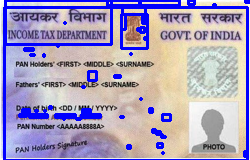

In [38]:
# Display the original image with contour

print('Original Format Image')

Image.fromarray(original)

tampered Format Image


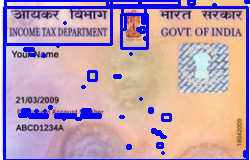

In [40]:
print('tampered Format Image')

Image.fromarray(tampered)

Different Image


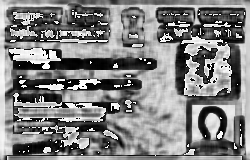

In [41]:
# Display the diff Image with black

print('Different Image')

Image.fromarray(diff)

Threshold Image


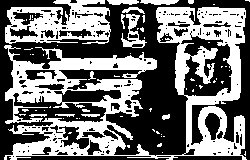

In [42]:
# Display the threshold Image with black

print('Threshold Image')

Image.fromarray(thresh)

**Summary**

Finding out structural similarity of images helped in finding the difference or similarity between the shape of the images.And threshold and contours also help to analyze the shape anaylsis and recognition.

SSIM = 31.2% we can say based on this score the user provide the fake image.

Also we visualized the differenced between the images by displaying image using contours, difference and threshold.

**Scope**

Any organization can use this to identify whether the id provided is fake or genuine.